In [1]:
import datetime
import warnings

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from hmmlearn.hmm import GaussianHMM

In [2]:
#Load historical stock quotes
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2021, 12, 31)

intc = yf.Ticker('INTC').history(start = start_date, end = end_date)

In [8]:
intc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,14.274729,14.357882,14.136139,14.136139,26429200,0.0,0
2010-01-04,14.406388,14.572695,14.364810,14.468752,47800900,0.0,0
2010-01-05,14.510326,14.544973,14.274723,14.461820,52357700,0.0,0
2010-01-06,14.420245,14.503400,14.323233,14.413316,40037400,0.0,0
2010-01-07,14.364815,14.385604,14.094566,14.274733,54041500,0.0,0


In [7]:
#Take the percentage difference of closing stock prices
diff_percentages = 100.0 * np.diff(intc['Close']) / intc['Close'][:-1]

In [10]:
#Stack the differences and volume values column-wise for training
training_data = np.column_stack([diff_percentages, intc['Volume'][:-1]])

In [13]:
#Create and train Gaussian HMM
hmm = GaussianHMM(n_components = 7, covariance_type = 'diag', n_iter = 1000)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    hmm.fit(training_data)

In [14]:
#Generate data using the HMM model
num_samples = 300
samples, _ = hmm.sample(num_samples)

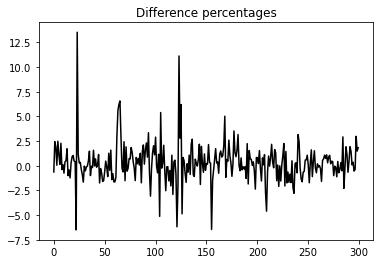

In [16]:
#Plot the difference percentages
plt.figure()
plt.title('Difference percentages')

plt.plot(np.arange(num_samples), samples[:, 0], c = 'black');

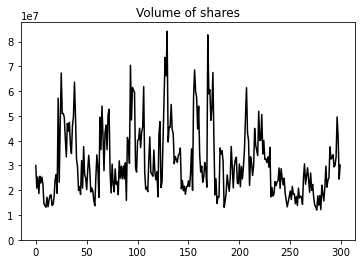

In [21]:
#Plot the volume of shares traded
plt.figure()
plt.title('Volume of shares')

plt.plot(np.arange(num_samples), samples[:, 1], c = 'black')
plt.ylim(ymin = 0);

In [23]:
#Compute accuracy for difference percentages
diff_percentages_part = diff_percentages[:300]
diff_percent_accuracy = np.mean(diff_percentages_part.ravel() == samples[:, 0].ravel()) * 100

print(f'Accuracy on difference percentages: {diff_percent_accuracy}')

Accuracy on difference percentages: 0.0


In [24]:
intc_volume_part = intc['Volume'][:300]
intc_percent_accurcay = np.mean(intc_volume_part.ravel() == samples[:, 1].ravel()) * 100

print(f'Accuracy on Volume of shares traded: {intc_percent_accurcay}')

Accuracy on Volume of shares traded: 0.0
